In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import sys, os
sys.path.insert(0, os.path.abspath('/home/qdeng/Github/cvxbook_additional_exercises/python'))

In [29]:
u1 = 2
u2 = -3

x1 = cp.Variable((1,1))
x2 = cp.Variable((1,1))

# obj = cp.Minimize(x1**2+2*x2-x1*x2-x1)
obj = cp.Minimize((x1-1/2*x2)**2+7/4*x2**2-x1)

constraints = []
constraints += [x1+2*x2-u1<=0]
constraints += [x1-4*x2-u2<=0]
constraints += [5*x1+76*x2-1<=0]

problem = cp.Problem(obj, constraints)

# print optimal costs
print(problem.solve())

print('\nOptimal Variable Values:')
# Print optimal variable values
print(x1.value, x2.value)

print('\nDual Values:')
# Print dual variable values
for cons in constraints:
    print(cons, cons.dual_value)

8.222222222222229

Optimal Variable Values:
[[-2.33333333]] [[0.16666667]]

Dual Values:
var839 + 2.0 @ var840 + -2.0 <= 0.0 [[0.]]
var839 + -4.0 @ var840 + --3.0 <= 0.0 [[4.77430556]]
5.0 @ var839 + 76.0 @ var840 + -1.0 <= 0.0 [[0.21180556]]


In [30]:
# Constraint No.1 at Optimal Primal, it is <=0
x1.value+2*x2.value-u1

array([[-4.]])

In [31]:
# Constraint No.2 at Optimal Primal, it is <=0
x1.value-4*x2.value-u2

array([[-1.33226763e-15]])

In [32]:
# Constraint No.3 at Optimal Primal, it is <=0
5*x1.value+76*x2.value-1

array([[0.]])

In [36]:
# Complementary Slackness for Constraint No.1, it is slack
constraints[0].dual_value*(x1.value+2*x2.value-u1)

array([[-0.]])

In [37]:
# Complementary Slackness for Constraint No.2, it is tight
constraints[1].dual_value*(x1.value-4*x2.value-u2)

array([[-6.36065275e-15]])

In [38]:
# Complementary Slackness for Constraint No.3, it is tight
constraints[1].dual_value*(5*x1.value+76*x2.value-1)

array([[0.]])

In [47]:
# Check gradient of Lagrangian with respect to x vanishes, yes it does as e-15 is basically zero
df0 = np.array([[2*x1.value-x2.value-1],[4*x2.value-x1.value]]).reshape(2,1)
df1 = np.array([[1],[2]]).reshape(2,1)
df2 = np.array([[1],[-4]]).reshape(2,1)
df3 = np.array([[5],[76]]).reshape(2,1)

df0 + constraints[0].dual_value*df1 + constraints[1].dual_value*df2 + constraints[2].dual_value*df3

array([[ 2.66453526e-15],
       [-3.55271368e-15]])

KKT conditions is therefore met.

### Perturbation

In [50]:
for p1 in [0,-.1,.1]:
    for p2 in [0,-.1,.1]:
        u1 = 2 + p1
        u2 = -3 + p2
        
        x1 = cp.Variable((1,1))
        x2 = cp.Variable((1,1))
        
        # obj = cp.Minimize(x1**2+2*x2-x1*x2-x1)
        obj = cp.Minimize((x1-1/2*x2)**2+7/4*x2**2-x1)
        
        constraints = []
        constraints += [x1+2*x2-u1<=0]
        constraints += [x1-4*x2-u2<=0]
        constraints += [5*x1+76*x2-1<=0]
        
        problem = cp.Problem(obj, constraints)
        
        # print optimal costs
        print('p1: ', p1, 'p2: ',p2, ' ',problem.solve())

# print('\nOptimal Variable Values:')
# # Print optimal variable values
# print(x1.value, x2.value)

# print('\nDual Values:')
# # Print dual variable values
# for cons in constraints:
#     print(cons, cons.dual_value)

p1:  0 p2:  0   8.222222222222229
p1:  0 p2:  -0.1   8.706386718750005
p1:  0 p2:  0.1   7.751525607638891
p1:  -0.1 p2:  0   8.222222222222229
p1:  -0.1 p2:  -0.1   8.706386718750005
p1:  -0.1 p2:  0.1   7.751525607638891
p1:  0.1 p2:  0   8.222222222222229
p1:  0.1 p2:  -0.1   8.706386718750005
p1:  0.1 p2:  0.1   7.751525607638891


## Optimal Spacecraft Landing

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

h = 1.0
g = 0.1
m = 10.0
Fmax = 10.0
p0 = np.array([50, 50, 100])
v0 = np.array([-10, 0, -10])
alpha = 0.5
gamma = 1.0
K = 35

In [143]:
f = cp.Variable((3,K))
p = cp.Variable((3,K+1))
v = cp.Variable((3,K+1))

obj = cp.Minimize(gamma*cp.norm2(f))

constraints = []
constraints += [v[:,k+1] == v[:,k] + h/m*f[:,k] - h*g*np.array([0,0,1])for k in range(K)] # affine
constraints += [p[:,k+1] == p[:,k] + h/2*(v[:,k]+v[:,k+1]) for k in range(K)] # affine
constraints += [p[:,0]==p0]
constraints += [v[:,0]==v0]
constraints += [p[:,K]==0]
constraints += [v[:,K]==0]
# constraints += [p[2,k]>=0 for k in range(K+1)]
constraints += [cp.norm2(f[:,k])<=Fmax for k in range(K)]
constraints += [p[2,k]>=alpha*cp.norm2(p[0:2,k]) for k in range(K+1)]

problem = cp.Problem(obj, constraints)

# print optimal costs
print(problem.solve())


37.27543912688528


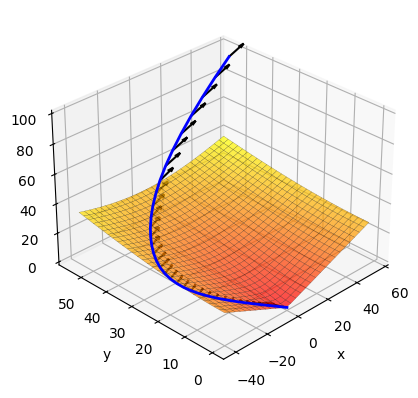

In [144]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
X = np.linspace(-40, 55, num=30)
Y = np.linspace(0, 55, num=30)
X, Y = np.meshgrid(X, Y)
Z = alpha*np.sqrt(X**2+Y**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.autumn, linewidth=0.1, alpha = 0.7, edgecolors="k")
ax = plt.gca();
ax.view_init(azim=225)
#Have your solution be stored in p
ax.plot(xs=p.value[0,:],ys=p.value[1,:],zs=p.value[2,:], c='b', lw=2, zorder = 5)
ax.quiver(p.value[0,:-1],p.value[1,:-1],p.value[2,:-1],
         f.value[0,:], f.value[1,:], f.value[2,:], zorder=5, color="black")

ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
plt.show()

In [160]:
# K = cp.Variable(1)
f = cp.Variable((3,K))
p = cp.Variable((3,K+1))
v = cp.Variable((3,K+1))


obj = cp.Minimize(cp.sum(cp.hstack([cp.norm1(p[:,k]) for k in range(K+1)])) + cp.sum(cp.hstack([cp.norm1(v[:,k]) for k in range(K+1)])) )

constraints = []
constraints += [v[:,k+1] == v[:,k] + h/m*f[:,k] - h*g*np.array([0,0,1])for k in range(K)] # affine
constraints += [p[:,k+1] == p[:,k] + h/2*(v[:,k]+v[:,k+1]) for k in range(K)] # affine
constraints += [p[:,0]==p0]
constraints += [v[:,0]==v0]
constraints += [p[:,K]==0]
constraints += [v[:,K]==0]
constraints += [cp.norm2(f[:,k])<=Fmax for k in range(K)]
constraints += [p[2,k]>=alpha*cp.norm2(p[:2,k]) for k in range(K+1)]



problem = cp.Problem(obj, constraints)

# print optimal costs
print(problem.solve())


2139.915218035745


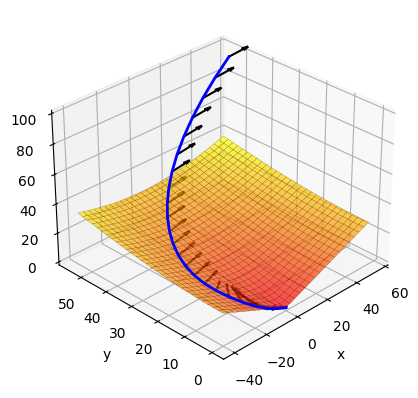

In [161]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
X = np.linspace(-40, 55, num=30)
Y = np.linspace(0, 55, num=30)
X, Y = np.meshgrid(X, Y)
Z = alpha*np.sqrt(X**2+Y**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.autumn, linewidth=0.1, alpha = 0.7, edgecolors="k")
ax = plt.gca();
ax.view_init(azim=225)
#Have your solution be stored in p
ax.plot(xs=p.value[0,:],ys=p.value[1,:],zs=p.value[2,:], c='b', lw=2, zorder = 5)
ax.quiver(p.value[0,:-1],p.value[1,:-1],p.value[2,:-1],
         f.value[0,:], f.value[1,:], f.value[2,:], zorder=5, color="black")

ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
plt.show()

In [162]:
cp.sum(cp.hstack([cp.norm2(p[:,k]) for k in range(K+1)])) + cp.sum(cp.hstack([cp.norm2(v[:,k]) for k in range(K+1)])) 

Expression(CONVEX, NONNEGATIVE, ())

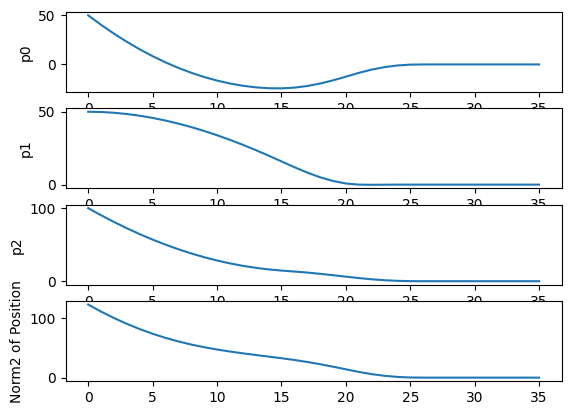

In [163]:
fig, axes = plt.subplots(4,1)
for i, ax in enumerate(axes):
    if i<3:
        ax.plot(p.value[i])
        ax.set_ylabel(f'p{i}')
    else: 
        ax.plot(np.linalg.norm(p.value,2, axis=0))
        ax.set_ylabel('Norm2 of Position')

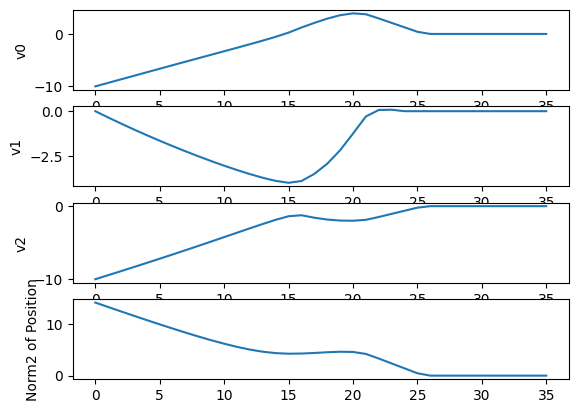

In [164]:
fig, axes = plt.subplots(4,1)
for i, ax in enumerate(axes):
    if i<3:
        ax.plot(v.value[i])
        ax.set_ylabel(f'v{i}')
    else: 
        ax.plot(np.linalg.norm(v.value,2, axis=0))
        ax.set_ylabel(f'Norm2 of Position')